# Heterogeneous Agents 

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import random

In [2]:
beta = 0.96
delta = 0.06
alpha = 0.36
u = 0.1
k_low = 0.001
k_high = 40
params = beta, delta, alpha, u
transition = np.array([[0.9, 0.1], [0.9, 0.1]])


In [3]:
def get_kstar(kstar, *params):
    beta, delta, alpha, u= params
    f= (1-beta*(1-delta)*(alpha*np.sign(kstar)*np.abs(kstar)**(alpha-1))*(1-u)**(1-alpha)+(1-alpha)*np.sign(kstar)*np.abs(kstar)**(alpha)*(1-u)**(-alpha))/(beta*(1-delta)**(2)-beta*(1-delta)-(1-delta) + 1)-kstar
    return f

In [4]:
optimize.fsolve(get_kstar, 0.1, params)

array([0.10389588])

In [5]:
def get_kbar(params):
    beta, delta, alpha, u = params
    f= (alpha*beta/(1-beta*(1-delta)))**(1/(1-alpha))
    return f

def get_w(kbar):
    w= (1-alpha)*kbar**(alpha)*(1-u)**(-alpha)
    return w

def get_r(kbar):
    r= alpha*kbar**(alpha-1)*(1-u)**(1-alpha)
    return r

In [6]:
def het_gents(kbar, k_low, k_high, transition, params, N = 200, thresh = 1e-16, maxiters = 1000):
    beta, delta, alpha, u = params
    random.seed(111)
    kgrid= np.linspace(k_low, k_high, N)
    V_old= np.zeros((2,N))
    V_new= np.zeros_like(V_old)
    obj= np.zeros_like(V_old)
    c= np.zeros_like(V_old)
    pol_f= np.zeros_like(V_old)
    diff= 15
    itr= 0

    while diff > thresh and itr <= maxiters:
        for i in range(len(kgrid)):
            k = kgrid[i]
            r = get_r(kbar)
            w = get_w(kbar)
            c[0, :] = r*k + w*1 + (1 - delta)*k - kgrid
            c[1, :] = r*k + w*0 + (1 - delta)*k - kgrid   
            obj[c <= 0] = -999999
            obj[c > 0]= np.log(c[c > 0])
            V = obj + beta*(np.dot(transition, V_old))
            V_new[:, i] = np.amax(V, axis = 1) 
            max_ind = np.argmax(V, axis = 1)
            pol_f[:, i] = kgrid[max_ind]
        diff = np.linalg.norm(V_new - V_old)**(2)
        V_old = V_new.copy()
        itr += 1
        
        if diff <= thresh or itr == maxiters:
            print("Iteration:", str(itr), str(diff))
        
    return pol_f, V_new, kgrid

In [7]:
kbar = get_kbar(params)
pol_f, V_new, kgrid = het_gents(kbar, k_low, k_high, transition, params, N = 200, thresh = 1e-16, maxiters = 1000)

Iteration: 485 9.839947355591388e-17


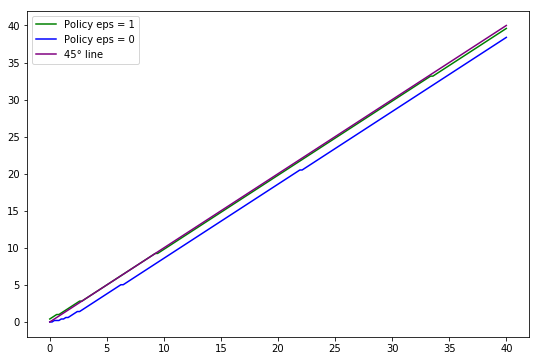

In [8]:
fig = plt.figure(figsize=(9,6))
plt.plot(kgrid, pol_f[0, :], color = "g", label = "Policy eps = 1")
plt.plot(kgrid, pol_f[1, :], color = "b", label = "Policy eps = 0")
plt.plot(kgrid, kgrid, color = "purple", label = "45° line")
plt.legend()
plt.show();

In [9]:
# Out of time unfortunately